In [1]:
import pandas as pd
df = pd.read_excel('Train_Set.xlsx')

In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

# EDA

In [6]:
# Extract day from the date of journey
def extract_day_month(df):
    # Extract day from Day_of_Journey
    df['Day_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.day 
    # Extract Month from Day_of_journey
    df['Month_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.month
    df = df.drop(['Date_of_Journey'],axis=1)
    return df

In [7]:
df = extract_day_month(df)

In [8]:
# Extracting Hours and  Minutes from Dep_Time
def extract_departure_hours_minutes(df):
    # Extract hours from Dep_Time
    df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
    # Extract Minutes from Dep_Time
    df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df = df.drop(['Dep_Time'],axis=1)
    return df
    

In [9]:
df = extract_departure_hours_minutes(df)

In [10]:
def extract_arrival_hours_minutes(df):
    # Extract hours from Arrival_Time
    df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    # Extract Minutes from Arrival_Time
    df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df = df.drop(['Arrival_Time'],axis=1)
    return df


In [11]:
df = extract_arrival_hours_minutes(df)

In [12]:
# converting Duration  into duration_hour and duration_mins
def extract_duration_hrs_mins(df):
    duration = list(df['Duration'])
    for i in range(len(duration)):
        # check if duration contains only hrs or minutes
        if len(duration[i].split()) != 2:
            if "h" in duration[i]:
                # Adds 0 minute
                duration[i] = duration[i].strip() + " 0m"
            else:
                # Adds o hour
                duration[i] = "0h " + duration[i]
    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        # Extract hours from Dep_Time
        duration_hours.append(int(duration[i].split(sep = "h")[0]))
        # Extract minutes from Dep_Time
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    #Adding duration_hours to df
    df['duration_hours'] = duration_hours
    #Adding duration_mins to df
    df['duration_mins'] = duration_mins
    df = df.drop(['Duration'],axis=1)
    return df

In [13]:
df = extract_duration_hrs_mins(df)

In [14]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling categorical Data

In [15]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

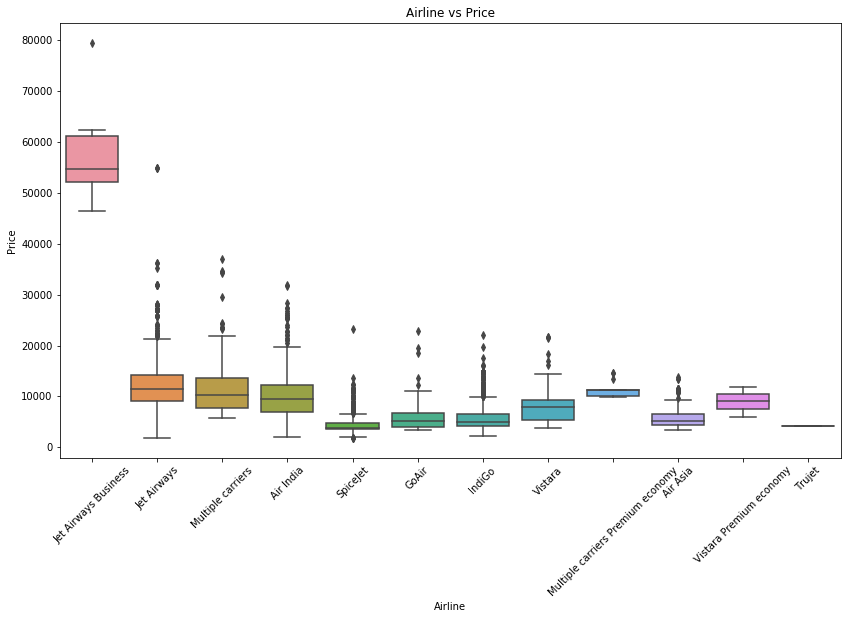

In [16]:
# Compare Airline vs Price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Airline', y = 'Price', data = df.sort_values("Price", ascending=False))
plt.title('Airline vs Price')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

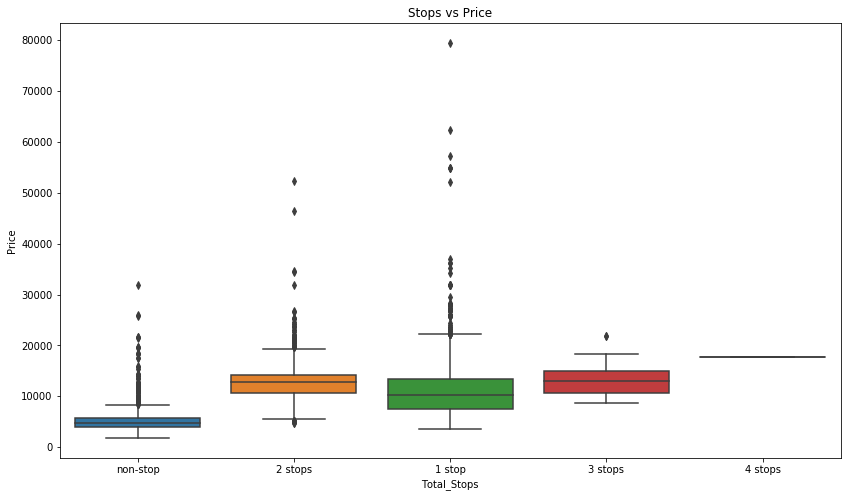

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = df)
plt.title('Stops vs Price')
plt.show()

In [19]:
df = df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [20]:
df = df.replace({'Delhi':'New Delhi'})
df['Source'].value_counts()

New Delhi    4536
Kolkata      2871
Banglore     2197
Mumbai        697
Chennai       381
Name: Source, dtype: int64

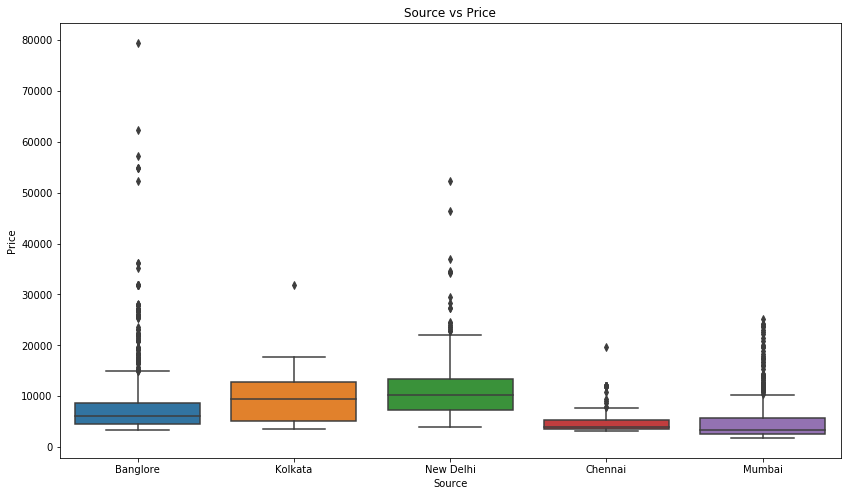

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Source', y = 'Price', data = df)
plt.title('Source vs Price')
plt.show()

In [23]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

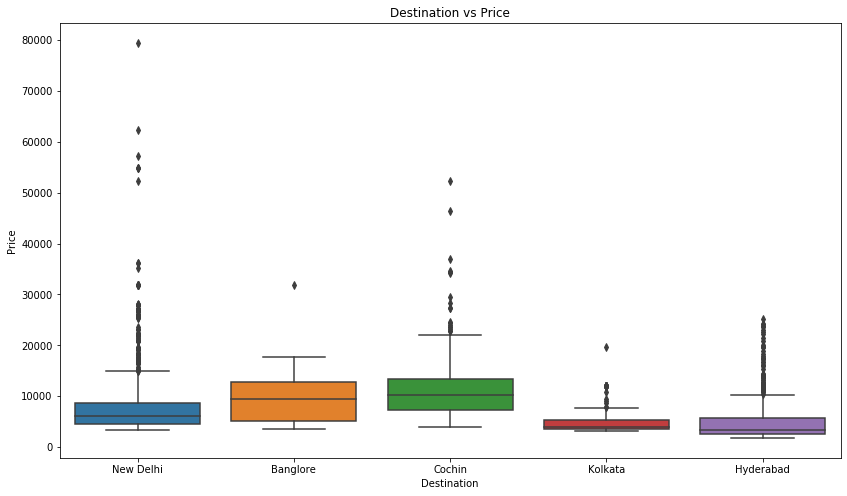

In [24]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Destination', y = 'Price', data = df)
plt.title('Destination vs Price')
plt.show()

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [26]:
def onehot_variables(df):
    onehot_columns = pd.get_dummies(df[['Airline','Source','Destination']],drop_first = True)
    df = pd.concat([df,onehot_columns],axis=1)
    df = df.drop(['Airline','Source','Destination'],axis=1)
    return df

In [27]:
df = onehot_variables(df)

In [28]:
df.head()

,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,...,0,0,0,0,0,1,1,0,0,0
3,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Additional Info contains almost 80 % no_info
# Route and Total stops are related to each other
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [30]:
df = df.drop(['Additional_Info','Route'],axis=1)

In [32]:
df.shape

(10682, 29)

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'],axis=1)
y = df['Price'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 111)

In [37]:
X_train.columns

Index(['Total_Stops', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [459]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
def model_evaluation(model):
    prediction = model.predict(X_test)
    print("RMSE ", np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score :", r2_score(y_test,prediction))

In [461]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [462]:
model_evaluation(rf)

RMSE  2112.8877195891237
R2 Score : 0.8041787484863654


# Hyperparameter Tuning

In [450]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [453]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, n_jobs = -1)

In [457]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [463]:
rf_random.best_params_

{'n_estimators': 944,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [460]:
model_evaluation(rf_random)

RMSE  2075.539304361163
R2 Score : 0.811040423035508


# Save the model to reuse it again

In [465]:
import pickle
# open the file to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(rf_random, file)